In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

#load CSV
pyber_ride_df = pd.read_csv("Resources/PyBer_ride_data.csv")
pyber_ride_df

city_data_df =  pd.read_csv("Resources/city_data.csv")
ride_data_df =  pd.read_csv("Resources/ride_data.csv")

# Get the columns and the rows that are not null.
city_data_df.count()

# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

# Get the unique values of the type of city.
city_data_df["type"].unique()

sum(city_data_df["type"]=="Rural")

# Get the data types of each column.
city_data_df.dtypes

#check that fare and ride_id are not objects
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [19]:

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])



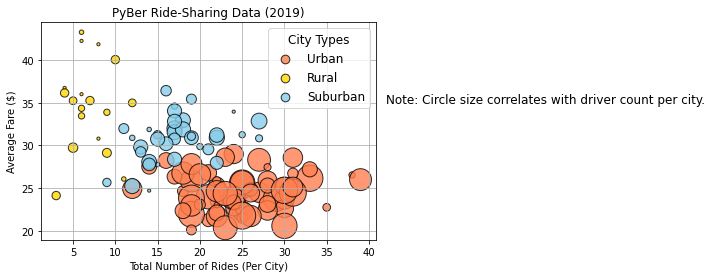

FileNotFoundError: [Errno 2] No such file or directory: 'PyBer_Analysis/Fig1.png'

<Figure size 432x288 with 0 Axes>

In [25]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

#Average fare by city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

#Ride counts by city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

#Average drivers by city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city type
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")


plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")


plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

#formatting
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()




lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.show()

# Save the figure.
plt.savefig("PyBer_Analysis/Fig1.png")